# Data analysis

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf

/home/volodymyr/envs/sudoku_nn/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/volodymyr/envs/sudoku_nn/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/volodymyr/envs/sudoku_nn/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/volodymyr/envs/sudoku_nn/lib/python3.7/site-packages

In [19]:
df = pd.read_csv('train.csv')

In [20]:
df.head()

,Id,Province_State,Country_Region,Date,ConfirmedCases,Fatalities
0,1,NaN,Afghanistan,2020-01-22,0.0,0.0
1,2,NaN,Afghanistan,2020-01-23,0.0,0.0
2,3,NaN,Afghanistan,2020-01-24,0.0,0.0
3,4,NaN,Afghanistan,2020-01-25,0.0,0.0
4,5,NaN,Afghanistan,2020-01-26,0.0,0.0


In [21]:
df.describe()

,Id,ConfirmedCases,Fatalities
count,22644.000000,22644.000000,22644.000000
mean,16355.000000,655.267002,29.015412
std,9451.983632,5428.632429,382.138505
min,1.000000,0.000000,0.000000
25%,8169.750000,0.000000,0.000000
50%,16355.000000,0.000000,0.000000
75%,24540.250000,51.000000,0.000000
max,32709.000000,126168.000000,15362.000000


In [22]:
df['Country_Region'].value_counts()

US                3996
China             2442
Canada             888
United Kingdom     740
France             740
                  ... 
Honduras            74
Mexico              74
Singapore           74
San Marino          74
Romania             74
Name: Country_Region, Length: 180, dtype: int64

In [23]:
df[df['ConfirmedCases']>=10]['Country_Region'].value_counts()

China                  2248
US                     1196
Canada                  208
France                  187
Australia               186
                       ... 
Antigua and Barbuda       2
Guinea-Bissau             2
Angola                    1
Liberia                   1
Fiji                      1
Name: Country_Region, Length: 159, dtype: int64

In [24]:
df[df['ConfirmedCases']>=10]['Date']

52       2020-03-14
53       2020-03-15
54       2020-03-16
55       2020-03-17
56       2020-03-18
            ...    
22565    2020-03-31
22566    2020-04-01
22567    2020-04-02
22568    2020-04-03
22569    2020-04-04
Name: Date, Length: 7736, dtype: object

In [25]:
df['Date'].nunique()

74

In [26]:
df['Country_Region'].nunique()

180

# DATA TRANSFORMATION

NaN values imputation

In [27]:
df['Province_State'] = df['Province_State'].fillna('unknown')

In [28]:
df.head()

,Id,Province_State,Country_Region,Date,ConfirmedCases,Fatalities
0,1,unknown,Afghanistan,2020-01-22,0.0,0.0
1,2,unknown,Afghanistan,2020-01-23,0.0,0.0
2,3,unknown,Afghanistan,2020-01-24,0.0,0.0
3,4,unknown,Afghanistan,2020-01-25,0.0,0.0
4,5,unknown,Afghanistan,2020-01-26,0.0,0.0


In [29]:
len(df)

22644

In [30]:
df['Country_Region'] = df['Country_Region'].astype('category')
df['Province_State'] = df['Province_State'].astype('category')

In [31]:
mapping_region = dict(zip(df['Country_Region'].values,df['Country_Region'].cat.codes))
mapping_province = dict(zip(df['Province_State'].values,df['Province_State'].cat.codes))

In [32]:
def slice_data(df,length=5):
    X = []
    y1 = []
    y2 = []
    X_cat1 = []
    X_cat2 = []
    for i in range(len(df)-length):
            X1 = df['ConfirmedCases'].values[i:length+i].reshape(-1,1)
            X2 = df['Fatalities'].values[i:length+i].reshape(-1,1)
            X.append(np.hstack((X1,X2)))
            y1.append(df['ConfirmedCases'].values[length+i])
            y2.append(df['Fatalities'].values[length+i])
            X_cat1.append(tf.keras.utils.to_categorical(
                mapping_region[df['Country_Region'].values[i]],len(mapping_region)))
            X_cat2.append(tf.keras.utils.to_categorical(
                mapping_province[df['Province_State'].values[i]],len(mapping_province)))
    return np.array(X),\
np.concatenate((np.array(y1).reshape(-1,1),np.array(y2).reshape(-1,1)),axis=1),\
np.concatenate((np.array(X_cat1), np.array(X_cat2)),axis=1)
        

In [33]:
X_lstm,y,X_dense = slice_data(df,4)

In [34]:
len(X_lstm), len(y),len(X_dense)

(22640, 22640, 22640)

In [35]:
X_lstm

array([[[0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.]],

       [[0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.]],

       [[0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.]],

       ...,

       [[7., 1.],
        [7., 1.],
        [8., 1.],
        [8., 1.]],

       [[7., 1.],
        [8., 1.],
        [8., 1.],
        [9., 1.]],

       [[8., 1.],
        [8., 1.],
        [9., 1.],
        [9., 1.]]])

In [36]:
X_dense = X_dense.reshape(X_dense.shape[0],1,X_dense.shape[1])

In [37]:
X_lstm.shape

(22640, 4, 2)

In [38]:
y

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       ...,
       [9., 1.],
       [9., 1.],
       [9., 1.]])

In [39]:
y.shape

(22640, 2)

In [40]:
X_dense.shape

(22640, 1, 311)

In [41]:
train_size = int(len(X_dense)*0.9)

In [42]:
train_size

20376

In [43]:
X_dense_train, X_lstm_train, y_train = X_dense[:train_size],X_lstm[:train_size], y[:train_size]

In [44]:
X_dense_test, X_lstm_test, y_test = X_dense[train_size:],X_lstm[train_size:], y[train_size:]

# Building a model

In [56]:
def create_model(seed=5):
    tf.keras.backend.clear_session()
    tf.compat.v1.set_random_seed(seed)
#first input 
    lstm_input = tf.keras.layers.Input((X_lstm.shape[1],X_lstm.shape[2]))
    lstm_block1 = tf.keras.layers.LSTM(256,return_sequences=True)(lstm_input)
    lstm_block2 = tf.keras.layers.LSTM(128)(lstm_block1)
    reshape_layer = tf.keras.layers.Reshape((1,128))(lstm_block2)

#second input
    dense_input = tf.keras.layers.Input((X_dense.shape[1],X_dense.shape[2]))
    dense_layer1 = tf.keras.layers.Dense(1024,activation='relu')(dense_input)
    dropout_layer1 = tf.keras.layers.Dropout(0.3)(dense_layer1)
    dense_layer2 = tf.keras.layers.Dense(128,activation='relu')(dropout_layer1)

#embedd everything together
    concat_layer = tf.keras.layers.add([reshape_layer,dense_layer2])
    flatten_layer = tf.keras.layers.Flatten()(concat_layer)
    final_dense = tf.keras.layers.Dense(1024,activation='relu')(flatten_layer)
    output_layer = tf.keras.layers.Dense(2,activation='relu')(flatten_layer)

#Model
    model = tf.keras.Model(inputs=[lstm_input,dense_input],outputs=output_layer)
    model.compile(optimizer='Adam',loss=tf.keras.losses.MeanSquaredLogarithmicError())
    return model

In [ ]:
model = create_model()

In [53]:
callbacks = [tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', patience=15, verbose=1, factor=0.6),
             tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)]

In [54]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 4, 2)]       0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 1, 311)]     0                                            
__________________________________________________________________________________________________
unified_lstm (UnifiedLSTM)      (None, 4, 256)       265216      input_1[0][0]                    
__________________________________________________________________________________________________
dense (Dense)                   (None, 1, 1024)      319488      input_2[0][0]                    
______________________________________________________________________________________________

In [55]:
hist = model.fit(x=[X_lstm_train,X_dense_train],y=y_train, validation_data=[[X_lstm_test,X_dense_test],y_test]
          ,epochs=250,callbacks=callbacks)

Train on 20376 samples, validate on 2264 samples
Epoch 1/250
20376/20376 [==============================] - 4s 185us/sample - loss: 1.3555 - val_loss: 0.6763
Epoch 2/250
20376/20376 [==============================] - 3s 165us/sample - loss: 0.9117 - val_loss: 0.6283
Epoch 3/250
20376/20376 [==============================] - 3s 148us/sample - loss: 0.8222 - val_loss: 0.5835
Epoch 4/250
20376/20376 [==============================] - 3s 147us/sample - loss: 0.7717 - val_loss: 0.5667
Epoch 5/250
20376/20376 [==============================] - 3s 154us/sample - loss: 0.7358 - val_loss: 0.5634
Epoch 6/250
20376/20376 [==============================] - 3s 148us/sample - loss: 0.7098 - val_loss: 0.5563
Epoch 7/250
20376/20376 [==============================] - 3s 158us/sample - loss: 0.6845 - val_loss: 0.5473
Epoch 8/250
20376/20376 [==============================] - 3s 161us/sample - loss: 0.6676 - val_loss: 0.5586
Epoch 9/250
20376/20376 [==============================] - 3s 155us/sample - lo

20376/20376 [==============================] - 4s 173us/sample - loss: 0.4013 - val_loss: 0.3505
Epoch 76/250
20376/20376 [==============================] - 3s 158us/sample - loss: 0.3986 - val_loss: 0.3525
Epoch 77/250
20376/20376 [==============================] - 3s 158us/sample - loss: 0.4001 - val_loss: 0.3517
Epoch 78/250
20376/20376 [==============================] - 3s 156us/sample - loss: 0.4019 - val_loss: 0.3479
Epoch 79/250
20376/20376 [==============================] - 3s 171us/sample - loss: 0.3990 - val_loss: 0.3534
Epoch 80/250
20376/20376 [==============================] - 3s 160us/sample - loss: 0.3994 - val_loss: 0.3460
Epoch 81/250
20376/20376 [==============================] - 4s 173us/sample - loss: 0.4014 - val_loss: 0.3480
Epoch 82/250
20376/20376 [==============================] - 3s 159us/sample - loss: 0.3990 - val_loss: 0.3452
Epoch 83/250
20352/20376 [============================>.] - ETA: 0s - loss: 0.3959
Epoch 00083: ReduceLROnPlateau reducing learning r

# Train final model

In [57]:
model = create_model()

In [58]:
callbacks = [tf.keras.callbacks.ReduceLROnPlateau(monitor='loss', patience=15, verbose=1, factor=0.6),
             tf.keras.callbacks.EarlyStopping(monitor='loss', patience=20)]

In [59]:
hist = model.fit(x=[X_lstm,X_dense],y=y
          ,epochs=250,callbacks=callbacks)

Epoch 1/250
22640/22640 [==============================] - 4s 161us/sample - loss: 1.2521
Epoch 2/250
22640/22640 [==============================] - 3s 143us/sample - loss: 0.8595
Epoch 3/250
22640/22640 [==============================] - 3s 145us/sample - loss: 0.7765
Epoch 4/250
22640/22640 [==============================] - 3s 147us/sample - loss: 0.7371
Epoch 5/250
22640/22640 [==============================] - 3s 147us/sample - loss: 0.6955
Epoch 6/250
22640/22640 [==============================] - 3s 144us/sample - loss: 0.6776
Epoch 7/250
22640/22640 [==============================] - 3s 143us/sample - loss: 0.6560
Epoch 8/250
22640/22640 [==============================] - 3s 143us/sample - loss: 0.6412
Epoch 9/250
22640/22640 [==============================] - 3s 147us/sample - loss: 0.6200
Epoch 10/250
22640/22640 [==============================] - 4s 155us/sample - loss: 0.6111
Epoch 11/250
22640/22640 [==============================] - 4s 162us/sample - loss: 0.5907
Epoch 12

22640/22640 [==============================] - 4s 155us/sample - loss: 0.3869
Epoch 92/250
22640/22640 [==============================] - 4s 174us/sample - loss: 0.3860
Epoch 93/250
22640/22640 [==============================] - 4s 156us/sample - loss: 0.3877
Epoch 94/250
22640/22640 [==============================] - 3s 146us/sample - loss: 0.3881
Epoch 95/250
22640/22640 [==============================] - 3s 149us/sample - loss: 0.3903
Epoch 96/250
22640/22640 [==============================] - 4s 166us/sample - loss: 0.3863
Epoch 97/250
22640/22640 [==============================] - 4s 163us/sample - loss: 0.3880
Epoch 98/250
22640/22640 [==============================] - 4s 162us/sample - loss: 0.3875
Epoch 99/250
22640/22640 [==============================] - 4s 177us/sample - loss: 0.3858
Epoch 100/250
22640/22640 [==============================] - 4s 171us/sample - loss: 0.3852
Epoch 101/250
22640/22640 [==============================] - 4s 169us/sample - loss: 0.3841
Epoch 102/

22640/22640 [==============================] - 3s 141us/sample - loss: 0.3648
Epoch 179/250
22640/22640 [==============================] - 3s 142us/sample - loss: 0.3640
Epoch 180/250
22640/22640 [==============================] - 4s 155us/sample - loss: 0.3669
Epoch 181/250
22640/22640 [==============================] - 3s 142us/sample - loss: 0.3661
Epoch 182/250
22640/22640 [==============================] - 3s 145us/sample - loss: 0.3666
Epoch 183/250
22640/22640 [==============================] - 3s 144us/sample - loss: 0.3641
Epoch 184/250
22640/22640 [==============================] - 3s 149us/sample - loss: 0.3636
Epoch 185/250
22640/22640 [==============================] - 4s 161us/sample - loss: 0.3639
Epoch 186/250
22640/22640 [==============================] - 3s 149us/sample - loss: 0.3650
Epoch 187/250
22640/22640 [==============================] - 3s 153us/sample - loss: 0.3641
Epoch 188/250
22640/22640 [==============================] - 3s 148us/sample - loss: 0.3637
Ep

In [63]:
loss = hist.history['loss']

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

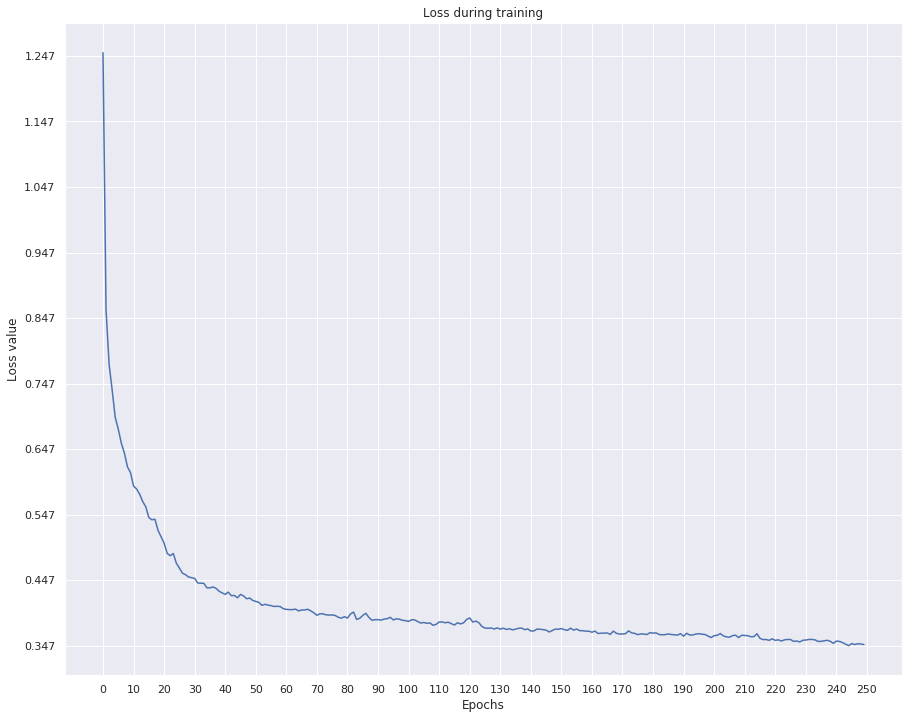

In [75]:
plt.figure(figsize=(15,12))
plt.plot(range(len(loss)),loss)
plt.xticks(range(0,len(loss)+10,10));
plt.yticks(np.arange(min(loss),max(loss),0.1))
plt.title('Loss during training')
plt.xlabel('Epochs')
plt.ylabel('Loss value');

# Predicting with a model

In [151]:
test_data = pd.read_csv('test.csv')

In [152]:
test_data.head()

,ForecastId,Province_State,Country_Region,Date
0,1,NaN,Afghanistan,2020-03-26
1,2,NaN,Afghanistan,2020-03-27
2,3,NaN,Afghanistan,2020-03-28
3,4,NaN,Afghanistan,2020-03-29
4,5,NaN,Afghanistan,2020-03-30


In [153]:
test_data['Date'] = pd.to_datetime(test_data['Date'])

In [154]:
test_data['Province_State'] = test_data['Province_State'].fillna('unknown')

In [155]:
test_data.head()

,ForecastId,Province_State,Country_Region,Date
0,1,unknown,Afghanistan,2020-03-26
1,2,unknown,Afghanistan,2020-03-27
2,3,unknown,Afghanistan,2020-03-28
3,4,unknown,Afghanistan,2020-03-29
4,5,unknown,Afghanistan,2020-03-30


In [167]:
def predict(model,X_lstm,X_dense,test_data,mapping_region,mapping_province):
    submission = []
    for i in range(len(test_data)):     
        pred = model.predict([[X_lstm],[X_dense]])
        pred = pred.astype(int)
        submission.append(pred)
        X_lstm = np.vstack((X_lstm,pred))[-4:]
        country_one_hot = tf.keras.utils.to_categorical(
                mapping_region[test_data['Country_Region'].values[i]],len(mapping_region)).reshape(1,-1)
        province_one_hot = tf.keras.utils.to_categorical(
                mapping_province[test_data['Province_State'].values[i]],len(mapping_province)).reshape(1,-1)
        X_dense = np.concatenate((np.array(country_one_hot), np.array(province_one_hot)),axis=1)
    return np.array(submission)

In [168]:
submission = predict(model,X_lstm.copy()[-1],X_dense.copy()[-1],test_data,mapping_region,mapping_province)

In [169]:
len(submission),len(test_data)

(13158, 13158)

In [181]:
test_data['ConfirmedCases'] = submission[:,:,:1].reshape(-1,1)

In [182]:
test_data.head()

,ForecastId,Province_State,Country_Region,Date,ConfirmedCases
0,1,unknown,Afghanistan,2020-03-26,10
1,2,unknown,Afghanistan,2020-03-27,11
2,3,unknown,Afghanistan,2020-03-28,15
3,4,unknown,Afghanistan,2020-03-29,16
4,5,unknown,Afghanistan,2020-03-30,15


In [192]:
test_data['Fatalities'] = submission[:,:,1:].reshape(-1,1)

In [193]:
test_data.head()

,ForecastId,Province_State,Country_Region,Date,ConfirmedCases,Fatalities
0,1,unknown,Afghanistan,2020-03-26,10,1
1,2,unknown,Afghanistan,2020-03-27,11,0
2,3,unknown,Afghanistan,2020-03-28,15,0
3,4,unknown,Afghanistan,2020-03-29,16,0
4,5,unknown,Afghanistan,2020-03-30,15,0


In [194]:
submission_data = test_data[['ForecastId','ConfirmedCases','Fatalities']]

In [195]:
submission_data.to_csv('my_submission.csv',index=False)